In [6]:
import sys
sys.path.append('../src')  # allow importing from src folder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from model_gd import LinearRegressionGD


Iteration    0 | Loss: 56297423231.031311
Iteration  200 | Loss: 6800441843.108088
Iteration  400 | Loss: 5598306766.912675
Iteration  600 | Loss: 5368289864.229050
Iteration  800 | Loss: 5217252526.540604
Iteration 1000 | Loss: 5109491881.297935
Iteration 1200 | Loss: 5031870710.159575
Iteration 1400 | Loss: 4975598543.202495
Iteration 1600 | Loss: 4934568223.379331
Iteration 1800 | Loss: 4904490419.118571


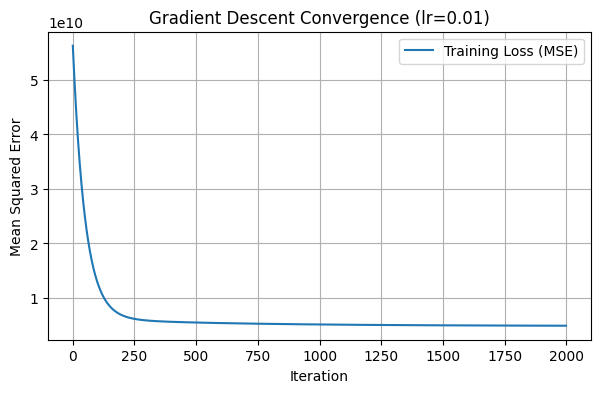

In [7]:

# Initialize model
model = LinearRegressionGD(learning_rate=0.01, n_iters=2000)

# Train model
model.fit(X_train, y_train, verbose=True)

# Plot training loss
model.plot_convergence()

# Predict
y_pred = model.predict(X_test)


In [8]:
# Load dataset
data = pd.read_csv('../data/california_housing.csv')

# Select relevant features (must all be numeric)
features = [
    'longitude', 'latitude', 'housing_median_age', 
    'total_rooms', 'total_bedrooms', 'population', 
    'households', 'median_income'
]
target = 'median_house_value'

# Subset the data
X = data[features]
y = data[target]

# Handle missing values if any
X = X.fillna(X.mean())

# Ensure numeric dtype (in case dataset had text)
X = X.select_dtypes(include=[np.number])
y = pd.to_numeric(y, errors='coerce')

# Remove any rows with NaN in target
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Flatten y to 1D (important for your Gradient Descent model)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Check final shapes
print("✅ Data Prepared Successfully")
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Number of features:", X_train.shape[1])


✅ Data Prepared Successfully
Training samples: 16512
Test samples: 4128
Number of features: 8


In [9]:
results = []
alphas = [1e-4, 1e-3, 1e-2, 5e-2]

print("🔹 Training Linear Regression (Gradient Descent)\n")

for alpha in alphas:
    print(f"Training with learning_rate = {alpha} ...")

    model = LinearRegressionGD(learning_rate=alpha, n_iters=2000)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    train_time = end - start

    print(f"✅ alpha={alpha:<6} | MSE={mse:.4f} | R2={r2:.4f} | Time={train_time:.2f}s")

    results.append({
        'Method': f'GD (α={alpha})',
        'Learning Rate': alpha,
        'MSE': mse,
        'R² Score': r2,
        'Train Time (s)': train_time
    })

results_df = pd.DataFrame(results)
print("\n📊 Summary of Gradient Descent Results:")
display(results_df)


🔹 Training Linear Regression (Gradient Descent)

Training with learning_rate = 0.0001 ...
✅ alpha=0.0001 | MSE=39119583718.1739 | R2=-1.9853 | Time=0.20s
Training with learning_rate = 0.001 ...
✅ alpha=0.001  | MSE=6898053573.1560 | R2=0.4736 | Time=0.18s
Training with learning_rate = 0.01 ...
✅ alpha=0.01   | MSE=5060312734.8342 | R2=0.6138 | Time=0.19s
Training with learning_rate = 0.05 ...
✅ alpha=0.05   | MSE=5029243723.2338 | R2=0.6162 | Time=0.19s

📊 Summary of Gradient Descent Results:


,Method,Learning Rate,MSE,R² Score,Train Time (s)
0,GD (α=0.0001),0.0001,3.911958e+10,-1.985296,0.196992
1,GD (α=0.001),0.0010,6.898054e+09,0.473595,0.181001
2,GD (α=0.01),0.0100,5.060313e+09,0.613837,0.190997
3,GD (α=0.05),0.0500,5.029244e+09,0.616208,0.194000


In [10]:
results_df = pd.DataFrame(results)
print("\nGradient Descent Results:")
display(results_df)

# Save comparison to CSV
results_df.to_csv('../data/processed_data.csv', index=False)



Gradient Descent Results:


,Method,Learning Rate,MSE,R² Score,Train Time (s)
0,GD (α=0.0001),0.0001,3.911958e+10,-1.985296,0.196992
1,GD (α=0.001),0.0010,6.898054e+09,0.473595,0.181001
2,GD (α=0.01),0.0100,5.060313e+09,0.613837,0.190997
3,GD (α=0.05),0.0500,5.029244e+09,0.616208,0.194000
